In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import utc
df1=pd.read_excel("Data Visualization Assignmnet.xlsx",sheet_name=0) #to read excel file
df1.shape#to display number of rows and columns 

(111, 4)

In [2]:
df1.head() #to display 1st 5 rows of sheet

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1,Kolenchery
1,2022-04-01,Fish,1,Kolenchery
2,2022-04-03,Beef,2,Tripunithura
3,2022-04-05,Prawns,1,Bangalore
4,2022-04-06,Dates,1,Mangalore


In [3]:
df1.columns #to display column names

Index(['DATE', 'DESCRIPTION', 'UNIT', 'PLACE'], dtype='object')

array([[<AxesSubplot:title={'center':'UNIT'}>]], dtype=object)

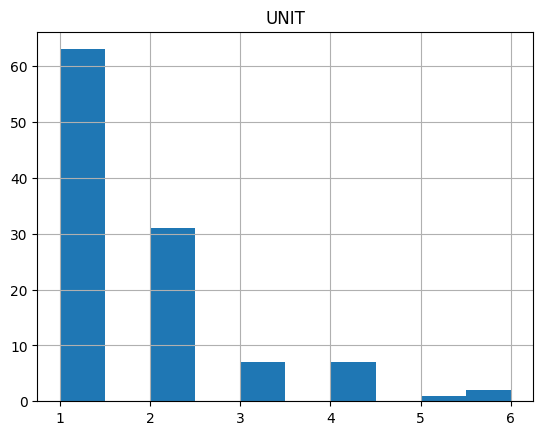

In [4]:
df1.hist('UNIT') #shows graph of units 

In [5]:
df1['UNIT'].mean() #displays average of all units

1.7207207207207207

# selecting a particular row and column

In [6]:
df1[['DESCRIPTION','UNIT','PLACE']].iloc[4:6]

,DESCRIPTION,UNIT,PLACE
4,Dates,1,Mangalore
5,Fish,2,Pathanamthitta


In [7]:
colors=['#8A2BE2','#7FFF00','#DC143C','#A9A9A9','#FF1493','#228B22','#FF4500','#FF0000','#FFFF00','#708090']#css color codes


In [8]:
df1['DESCRIPTION'].unique() #displays

array(['Beef', 'Fish', 'Prawns', 'Dates', 'Mango', 'Lemon', 'Dry fruits',
       'King Fish', 'Dryfruits', 'Kadumanga'], dtype=object)

# places with highest number of goods

In [9]:
p1=df1['PLACE'].unique() 
len(p1)#with this we conclude that there are 34 different places in the sheet

34

# filtering data where units are greater than 4

In [10]:
df1[df1['UNIT']>=4] #filtered data where units are more than or equal to 4

,DATE,DESCRIPTION,UNIT,PLACE
32,2022-04-21,King Fish,4,Noida - UP
51,2022-05-13,Beef,4,To Kottayam
52,2022-05-13,Mango,5,To Kottayam
81,2022-06-01,King Fish,6,Thrissur/ Guruvayoor
82,2022-06-01,Prawns,6,Eloor
83,2022-06-01,Beef,4,Eloor
88,2022-06-05,Prawns,4,malappuram
99,2022-06-28,Prawns,4,Kottayam
102,2022-06-28,Beef,4,Kottayam
106,2022-07-05,Lemon,4,NaN


# Filtering data based on dates

In [11]:
df1.sort_values(by = 'DATE', ascending = True, inplace = True)
display(df1.head())

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1,Kolenchery
1,2022-04-01,Fish,1,Kolenchery
2,2022-04-03,Beef,2,Tripunithura
3,2022-04-05,Prawns,1,Bangalore
4,2022-04-06,Dates,1,Mangalore


In [12]:
df1['Month']=df1['DATE'].dt.isocalendar().week
df1['Month']=df1['DATE'].dt.strftime('%Y-%m')
df1['Month']

0      2022-04
1      2022-04
2      2022-04
3      2022-04
4      2022-04
        ...   
106    2022-07
107    2022-07
109    2022-07
108    2022-07
110    2022-07
Name: Month, Length: 111, dtype: object

# to display products demand by month

In [13]:
df1['Month']=df1['DATE'].dt.date
df1.head()
day_average=df1.groupby(['Month']).count()
day_average.head()

,DATE,DESCRIPTION,UNIT,PLACE
Month,,,,
2022-04-01,2,2,2,2
2022-04-03,1,1,1,1
2022-04-05,1,1,1,1
2022-04-06,1,1,1,1
2022-04-07,4,4,4,4


# To display graph based on month 

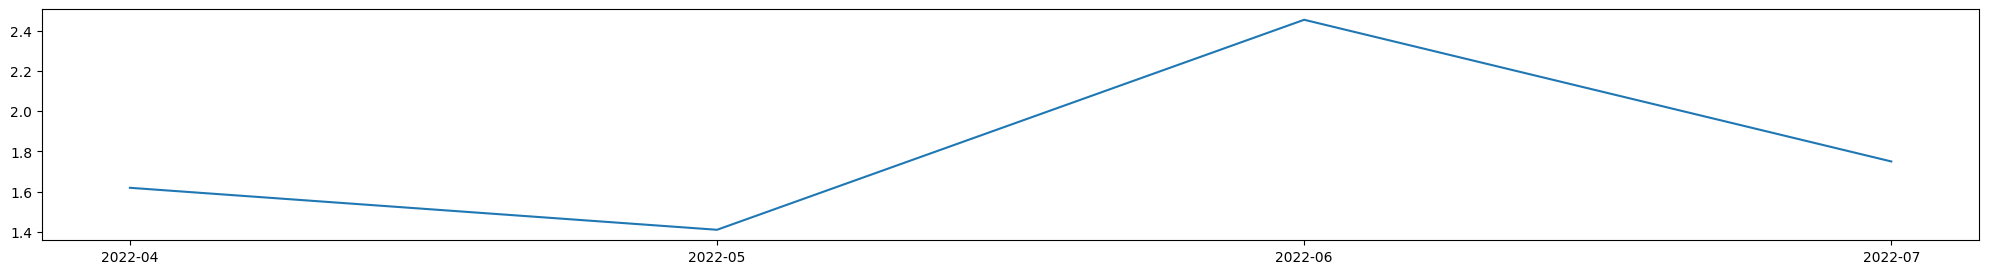

In [14]:
df1['Month']=df1['DATE'].dt.strftime('%Y-%m')
plt.figure(figsize=(25,3))
month_average=df1.groupby(['Month']).mean()
plt.plot(month_average.index,month_average['UNIT'])

# average unit by month 

<AxesSubplot:xlabel='Month'>

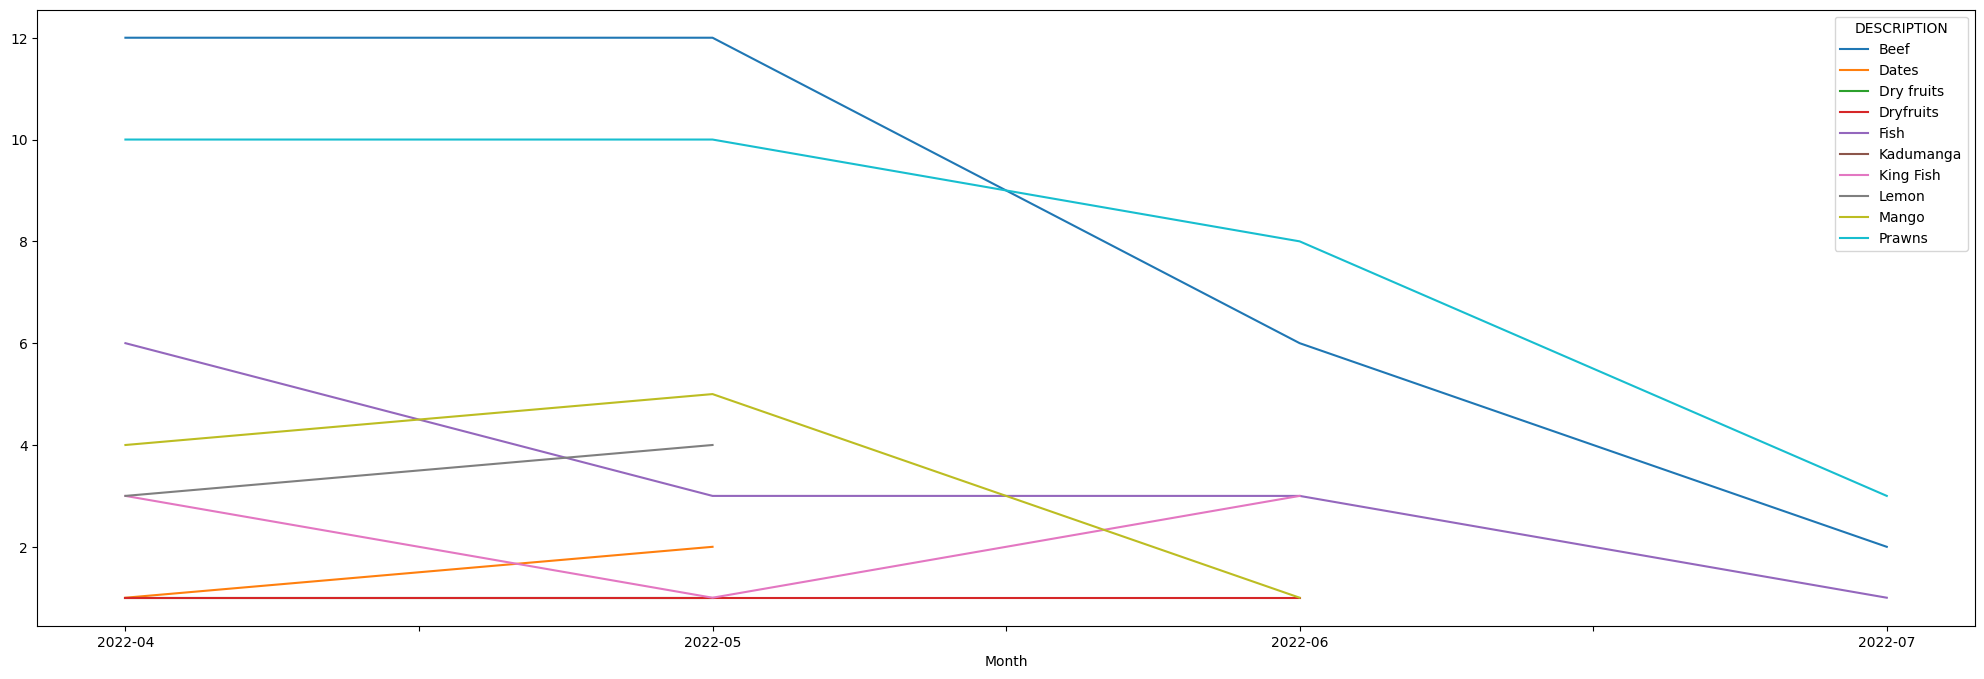

In [15]:
df1['Month'] = df1['DATE'].dt.strftime('%Y-%m')
month_average_crs = df1.groupby(['Month', 'DESCRIPTION'])['UNIT'].count().unstack()
month_average_crs.plot(figsize=(25,8))

# Pie chart based on demand of description

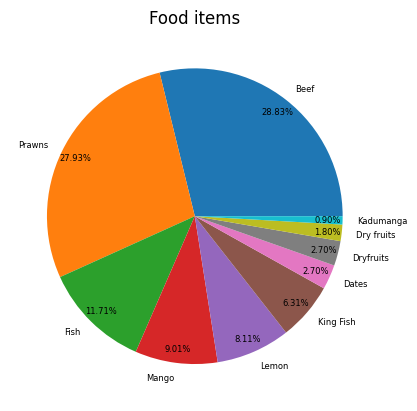

In [16]:
food_data=df1['DESCRIPTION'].value_counts().tolist() #counts value of a particular description
food_label=df1['DESCRIPTION'].value_counts().index # stores each and every name of description
plt.pie(food_data,labels=food_label,autopct='%1.2f%%',textprops={'size':6}, pctdistance=0.9) #autopct converts units into 
plt.title("Food items")
plt.show()